# Computer Vision & Convolutional Neural Networks (CNN) in TensorFlow - Exercises

### Spend 20 minutes on reading and interacting with [CNN Explained Website](https://poloclub.github.io/cnn-explainer/). What are the key terms? Explain convolution in your own words.

The key terms in case of CNNs are:
* *filters* are a number of distinguished, random sets of extractors for features in input images
* *kernel* is a square-shaped window that travels throught whole picture and performs a dot product of involved pixels. Has significant impact on the network depth and it's feature extraction properties (larger kernels 'see' bigger size details, smaller kernels pick up on small size details).
* *stride* is distance that kernel travels in each iteration. Also has impact on the network depth and overall performace
* *padding* is a kind of symmetrical overlay on each side of the picture. Allows to build deeper networks as we do not 'consume' the volume of the image. Most used padding type is to pad with zeros (0)
* *max pooling* is a type of pooling operation that uses both kernel and stride. Differs from them in terms of the logic as it picks up the highest value per kernel and forwards it to the next transformation
* *flattening* allows to transform a 3-dimensional image (width, height, color channels) to a 1-dimensional vector of size W x H x CC

Convolutional model works as per following steps:
1. Input an image (and if needed - scale it to desired size)
2. Pass it through convolution layers, each of which consists of:
	* kernel size
	* stride
	* padding
	* no of filters
	* activation function
3. Either use another convolution layer or pooling layer (no of dimensions should match each other):
	* convolution layer consist of the above
	* pooling layer shrinks the image and performs e.g. max pooling (so passes through only the highest value per kernel per stride)
4. Repeat 2 and 3 if necessary.
5. Flatten the output of last pooling layer (convert from 3D tensor to 1D tensor)
6. Output the final result with help of softmax function (if it's a multiclass classification problem, other problems may require different output activation functions) and as many outputs as there are final classes

### Find an ideal learning rate for a simple CNN model on you 10 class dataset.

In [15]:
import os
# Walk through the image directories
for dirpath, dirnames, filenames in os.walk('03_exercise_dataset/10_food_classes_all_data'):
    print(f"There are: {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are: 2 directories and 1 images in 03_exercise_dataset/10_food_classes_all_data
There are: 10 directories and 0 images in 03_exercise_dataset/10_food_classes_all_data/test
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/ice_cream
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/chicken_curry
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/steak
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/sushi
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/chicken_wings
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/grilled_salmon
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/hamburger
There are: 0 directories and 250 images in 03_exercise_dataset/10_food_classes_all_data/test/piz

In [16]:
# Set up the data directories
train_dir = "03_exercise_dataset/10_food_classes_all_data/train/"
test_dir = "03_exercise_dataset/10_food_classes_all_data/test"

In [17]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
# Return class names in SORTED order, as folders in directory are also sorted
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [18]:
# Preprocess the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   zoom_range=0.15,
                                   shear_range=0.15,
                                   vertical_flip=True,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=8,
                                               shuffle=True,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             color_mode='rgb',
                                             batch_size=8,
                                             shuffle=False,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
# Create simple CNN model
import tensorflow as tf
from tensorflow.keras import layers

# LearningRateScheduler to monitor the learning rate
from tensorflow.keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 100 **(epoch/20))

# Architecture
model_cnn = tf.keras.Sequential([
    layers.Conv2D(filters=8,
        kernel_size=5,
        strides=1,
        padding='valid',
        input_shape=(224, 224, 3),
        activation='relu'),
	layers.Conv2D(filters=8,
        kernel_size=3,
        activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=8,
        kernel_size=5,
        activation='relu'),
    layers.Conv2D(filters=8,
        kernel_size=3,
        activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(units=10,
		activation='softmax')
])

# Compile
model_cnn.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
	optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# Fit the model
cnn_history = model_cnn.fit(train_data,
                            epochs=30,
                            steps_per_epoch=len(train_data),
                            callbacks=[lr_scheduler])

# Evaluation
model_cnn.evaluate(test_data)

Epoch 1/30


2023-07-02 20:42:46.017514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 45s 47ms/step - loss: 2.1745 - accuracy: 0.2029 - lr: 1.0000e-04
Epoch 2/30
938/938 [==============================] - 44s 47ms/step - loss: 2.0599 - accuracy: 0.2667 - lr: 1.2589e-04
Epoch 3/30
938/938 [==============================] - 44s 47ms/step - loss: 1.9939 - accuracy: 0.2899 - lr: 1.5849e-04
Epoch 4/30
938/938 [==============================] - 44s 47ms/step - loss: 1.9549 - accuracy: 0.3073 - lr: 1.9953e-04
Epoch 5/30
938/938 [==============================] - 44s 47ms/step - loss: 1.9257 - accuracy: 0.3295 - lr: 2.5119e-04
Epoch 6/30
938/938 [==============================] - 47s 50ms/step - loss: 1.9075 - accuracy: 0.3351 - lr: 3.1623e-04
Epoch 7/30
938/938 [==============================] - 52s 55ms/step - loss: 1.8975 - accuracy: 0.3399 - lr: 3.9811e-04
Epoch 8/30
938/938 [==============================] - 46s 49ms/step - loss: 1.8850 - accuracy: 0.3444 - lr: 5.0119e-04
Epoch 9/30
938/938 [==============================] - 52s 5

2023-07-02 21:06:10.950838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 2.3218 - accuracy: 0.1000


[2.3218233585357666, 0.10000000149011612]

Text(0.5, 1.0, 'Learning rate vs Loss')

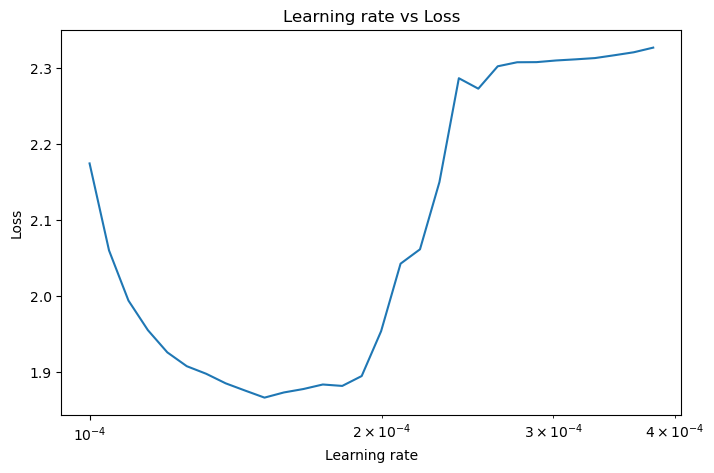

In [24]:
# Plotting the learning rate vs loss
lr = 1e-4 * (10**(tf.range(30)/50))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.semilogx(lr, cnn_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

As we can see, the lowest learning rate in this case is about 1.5e-4. Therefore if we'd were to choose a proper one for this case, we'd choose a value somehere a bit earlier than this one. We can assume that approx. 1.2e-4 would be a good fit.